Code to Plot Losses inline in this notebook

In [1]:
%matplotlib inline

#Introduction of deep learning

To help you understands the fundamentals of deep learning.Deep Learning is a subset of Machine Learning that uses mathematical functions to map the input to the output. These functions can extract non-redundant information or patterns from the data, which enables them to form a relationship between the input and the output

## The Task for the AI

Our goal is to construct and train ANN on thousand of images of hand written digits, So that it may successfully identify others when presented. The data will be incorporated is the MNIST database, which contains 60,000 of training and 10,000 of test images


## Prerequisite Python Moudules

first some software needs to be loaded in the python environment

In [2]:
#Random
#Python Random module is an in-built module of Python which is used to generate random numbers.
#Randomness is used as a tool to help the learning algorithms be more robust and ultimately result in better predictions and more accurate models


import numpy as np                 # advanced math library
import matplotlib.pyplot as plt    # MATLAB like plotting routines
import random                      # For generating random number
%matplotlib inline


from keras.datasets import mnist      # MNIST dataset is included in keras
from keras.models import Sequential   # Model type to be used

from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

# Loading Training Data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)   #printing the shape of the training set
print("y_train shape", y_train.shape)
print("X_test shape",X_test.shape)      #printing the shape of the test set
print("y_test shape", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


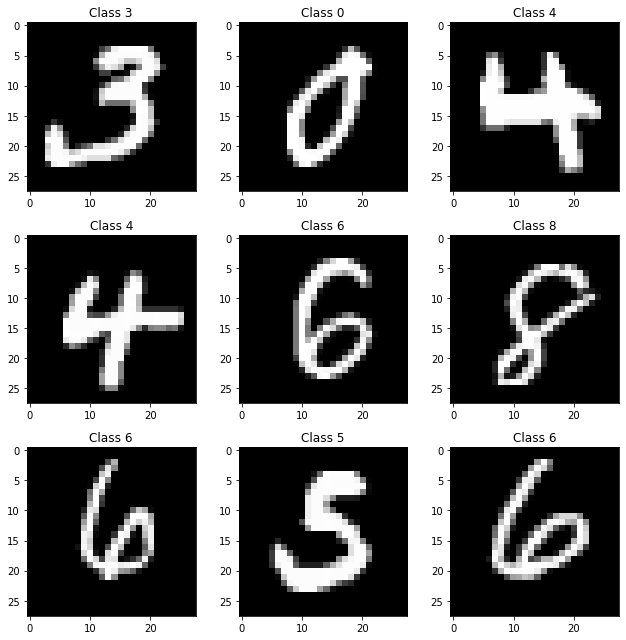

In [4]:
#Everytime Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create. This configuration can be adjusted at any time using the plt.
plt.rcParams['figure.figsize'] = (9,9)

for i in range(9):
  plt.subplot(3,3,i+1) #subplot as the name suggests creates more than one plots in same output window
  num = random.randint(0,len(X_train))  #randint from random library is used for randomly choosing the number within the length dataset
  plt.imshow(X_train[num], cmap = 'gray', interpolation = 'none') #plot the randomly chosen training data from the training set 
  plt.title("Class {}".format(y_train[num])) #set title
#adjusting the padding between and around subplots
plt.tight_layout()




In [5]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
# now print!        
matprint(X_train[num])

0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0    0    0    0    0  158  255  132    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0    0    0    0  158  253  215   94    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0    0    0  105  253  212    4    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0    0   58  238  241   95    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0    0  164  254  206    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0   85  252  236   66    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0   15  191  254  158    4 

In [6]:
#flatenning the image 2D Array to 1D Array
X_train = X_train.reshape(60000, 784)   # reshape 60,000 28*28 matrices into
X_test = X_test.reshape(10000, 784)     # reshape 10,000 28*28 matrices into
#Before applying any normalization, the type of the entire dataframe must be casted from 'str' to 'float' as far as it contains only numerical values.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')



## Normalaization

we will follow min-max standarization (since pixel cant take negative values so we cant us standard scalar process).
We want to normalize the input data in range 0-1 rather than 0-255.


In [7]:
#1byte = 8 bits. (Image is a 2D array) 2^8 =256, so 256 different values can be fit into 1 (0-255)
X_train /= 255   
# normalize each value for each pixel 
X_test /= 255   

Printing the new set of the dataset

In [8]:
print("Training matrix shape", X_train.shape) #printing x_train shape
print("Testing matrix shape", X_test.shape)   #printing y_train_shape

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


## One Hot Encoding

One Hot Encoding is used to convert numerical categorical variables into binary vectors.It is a part of Data Preprocessing. In Deep Learning model to feed the model with data that enables it to make a classification decision, we would require to perform One Hot Encoding during data processing.

In [9]:
nb_classes = 10 # number of unique digits
#Used to convert array of labeled data(from 0 to nb_classes - 1 ) to one-hot vector. 
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

 ## **Sequential**

There are three ways to create Keras models: Sequential Model, Functional API, Model Subclassing

The Sequential Model in Keras allows us to create models layer-by-layer for most problems. It is limited to single-input, single-output stacks of layers.

The Sequential model API is a way of creating deep learning models where an instance of the Sequential class is created and model layers are created and added to it.



In [10]:
# The Sequential model is a linear stack of layers
model = Sequential()

## **The first hidden layer**

In [11]:
# The first hidden layer is a set of 512 nodes (artifical neurons), [2^9=512, no. of neurons are generally choosen in 2^x form]
# Dense Layer is simple layer of neurons in which each neuron receives input from all the neurons of previous layer
model.add(Dense(512, input_shape = (784,))) #adding layers via the .add() method
#input_shape must be mentioned for only the first layer because following layers can do automatic shape inference
model.add(Dense(512, input_shape = (784,)))

In [12]:
#we use ReLU in hidden layer to avoid vanishing gradient problem and better computation performance 
model.add(Activation('relu'))

In [13]:
#the machine needs to memorize the pattern not the exact pixels, to do this we do dropouts
model.add(Dropout(0.2)) #to prevent the net from overfitting a dropout layer ignores a set of neurons (randomly) 
#turning off 20% of the neuron chosen randomly
#mainly dropout is applied after the non-linear activation function
#normal droput range is 0.1 to 0.5 - above 0.5 it is not advisable as it will hamper the learning

## **The second hidden layer**

In [14]:
# Adding Second layer
model.add(Dense(512)) #here the input_shape is not required because this layers can do automatic shape inference
#instead of each of 512 node receiving 784 input, the model is recieving 512 inputs from the output of 512 node layer
model.add(Activation('relu'))#we use ReLU in hidden layer to avoid vanishing gradient problem and better computation performance 
model.add(Dropout(0.2)) #to prevent the net from overfitting a dropout layer ignores a set of neurons randomly

# **The Final Output Layer**

1.This is the final hidden layer and should have as many neurons as there are outputs to the classification problem.

2.As this is a multi-class classification, Multiple neurons, one for each class is used. Here total 10 class are to be classified so no, of neurons taken 10

In [15]:
model.add(Dense(10))

Softmax Activation Function

1.The softmax function is used as the activation function in the output layer of neural network models that predict a multinomial probability distribution.

2.softmax is used as the activation function for multi-class classification problems where class membership is required on more than two class labels.

3.The softmax activation function transforms the raw outputs of the neural network into a vector of probabilities, essentially a probability distribution over the input classes.

In [16]:
model.add(Activation('softmax'))

#**Summary**

In [17]:
# Summary of the model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0

What are trainable and non- trininable parametersin the summary

**Trainable params** - .

Trainable Parameters in general are weights that are learnt during training. They are weight matrices that contribute to model’s predictive power, changed during back-propagation process.

**Non-trainable params** -

Non-trainable parameters is the number of weights that are not updated during training with backpropagation. There are mainly two types of non-trainable weights:

1. The ones that you have chosen to keep constant when training. This means that keras won't update these weights during training at all.
2. The ones that work like statistics in BatchNormalization layers. They're updated with mean and variance, but they're not "trained with backpropagation".

Here, weights of all the parameters are updated during training with backpropagation.

## Compiling the model

**The loss function**

It is a critical part of model training: it quantifies how well a model is performing a task by calculating a single number, the loss, from the model output and the desired target.
Categorical crossentropy is a loss function that is used in multi-class classification tasks.

These are tasks where an example can only belong to one out of many possible categories, and the model must decide which one.

The cross entropy is a measure of how different is the predicted distribution from the target distribution.

**Optimizer function** -

The optimizer helps to determine how quickly the model learns through gradient descent
The rate at which descends the gradient is called learning rate.
Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

**Metric**

Calculates how often predictions equal labels.
This metric creates two local variables, total and count that are used to compute the frequency with which y_pred matches y_true. This frequency is ultimately returned as binary accuracy.

In [18]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',
              metrics = ['accuracy'])


**Training the Model**

1. We train the model by calling fit method.

2. During training machine takes in input and weights are decided by computer randomly.

3. Then it calculates the difference between the actual output and desired output, that we called the loss function. The optimizer function directs the machine how the weights should be adjusted.

4. The fit method refers this cycle of calcualte --> compare --> adjust.

Input ---> X_train

Output ---> Y_train

Number of times cycle should run ---> epochs,

Controlling the amount of o/p to be produced ---> verbose

In [19]:
model.fit(X_train, Y_train,
          batch_size=128, epochs = 10,
          verbose=1)

Epoch 1/10
469/469 [==============================] - 14s 27ms/step - loss: 0.2451 - accuracy: 0.9252
Epoch 2/10
469/469 [==============================] - 18s 39ms/step - loss: 0.1204 - accuracy: 0.9627
Epoch 3/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0919 - accuracy: 0.9714
Epoch 4/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0799 - accuracy: 0.9750
Epoch 5/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0692 - accuracy: 0.9780
Epoch 6/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0630 - accuracy: 0.9808
Epoch 7/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0606 - accuracy: 0.9809
Epoch 8/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0574 - accuracy: 0.9824
Epoch 9/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0495 - accuracy: 0.9845
Epoch 10/10
469/469 [==============================] - 10s 22ms/step - loss: 0.054

#**Evaluation of the model**

In [20]:
score=model.evaluate(X_test,Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0778 - accuracy: 0.9779
Test score: 0.07779203355312347
Test accuracy: 0.9779000282287598


**Test Score/Loss Score**

It is the sum of errors made for each example in training or validation sets. Loss value implies how poorly or well a model behaves after each iteration of optimization.

**Test Accuracy**

The accuracy of a model is usually determined after the model parameters and is calculated in the form of a percentage. It is the measure of how accurate your model's prediction is compared to the true data.

#**Predicting test set data**

In [21]:
predicted_x = model.predict(X_test) #predicting the test set data
predicted_classes = np.argmax(predicted_x, axis = 1) 
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 [==============================] - 2s 5ms/step


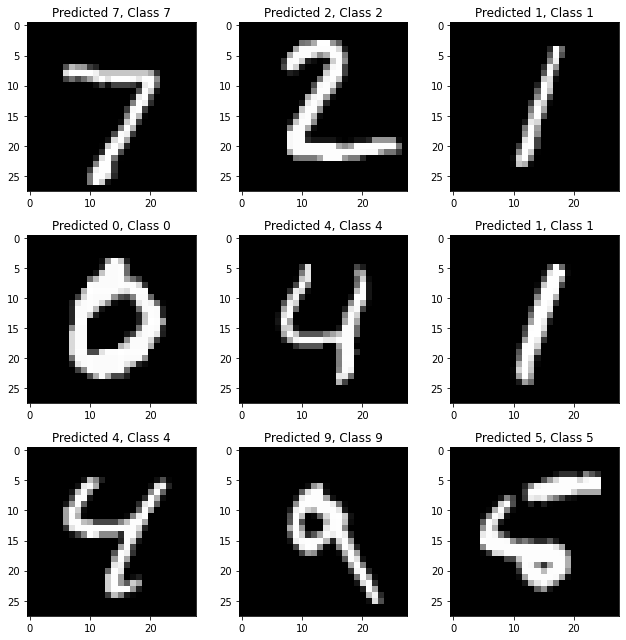

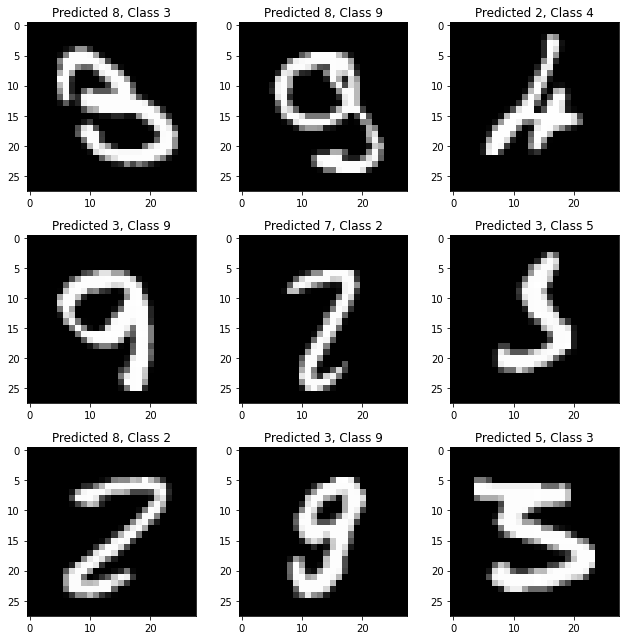

In [22]:
plt.figure() #plotting the actual class and image and the corresponding predicted class
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()

#**Describing the batch size**

In [23]:
model.fit(X_train, Y_train,
          batch_size=32, epochs = 10,
          verbose=1)

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1780 - accuracy: 0.9532
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1213 - accuracy: 0.9670
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1186 - accuracy: 0.9692
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1171 - accuracy: 0.9699
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1159 - accuracy: 0.9704
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1224 - accuracy: 0.9693
Epoch 7/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.1116 - accuracy: 0.9724
Epoch 8/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1175 - accuracy: 0.9719
Epoch 9/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1124 - accuracy: 0.9727
Epoch 10/10
1875/1875 [==============================] - 23s 12m

In [24]:
score=model.evaluate(X_test,Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 5ms/step - loss: 0.1266 - accuracy: 0.9733
Test score: 0.12664632499217987
Test accuracy: 0.9732999801635742


**Observations**

1. for optimal results we take 32 batch size.
2. accuracy improved as small data we are giving in batches

#**Increasing the Batch Size**

In [25]:
model.fit(X_train, Y_train,
          batch_size=10000, epochs = 10,
          verbose=1)

Epoch 1/10
6/6 [==============================] - 6s 958ms/step - loss: 0.0981 - accuracy: 0.9763
Epoch 2/10
6/6 [==============================] - 6s 951ms/step - loss: 0.0937 - accuracy: 0.9760
Epoch 3/10
6/6 [==============================] - 6s 948ms/step - loss: 0.0855 - accuracy: 0.9775
Epoch 4/10
6/6 [==============================] - 6s 949ms/step - loss: 0.0727 - accuracy: 0.9806
Epoch 5/10
6/6 [==============================] - 6s 949ms/step - loss: 0.0693 - accuracy: 0.9815
Epoch 6/10
6/6 [==============================] - 6s 944ms/step - loss: 0.0644 - accuracy: 0.9827
Epoch 7/10
6/6 [==============================] - 6s 941ms/step - loss: 0.0597 - accuracy: 0.9832
Epoch 8/10
6/6 [==============================] - 6s 939ms/step - loss: 0.0585 - accuracy: 0.9840
Epoch 9/10
6/6 [==============================] - 6s 957ms/step - loss: 0.0537 - accuracy: 0.9847
Epoch 10/10
6/6 [==============================] - 6s 939ms/step - loss: 0.0539 - accuracy: 0.9850


In [26]:
score=model.evaluate(X_test,Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0931 - accuracy: 0.9803
Test score: 0.09313424676656723
Test accuracy: 0.9803000092506409


**Observations**

 
 
1. Bigger the batch size, lesser is the noise in the gradients and so better is the gradient estimate. This allows the model to take a better step towards a minima.

2. Larger batch sizes make larger gradient steps than smaller batch sizes for the same number of samples.

3. By using bigger batch sizes , we speed up training, as it is equivalent to taking a few big steps, instead of taking many little steps.

4. Here the accuracy has incresed by negligible amt. after increasing the batch size.